# Section 2.6 — Inventory of continuous distributions

This notebook contains all the code examples from [Section 2.4 Inventory of continuous distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")

from plot_helpers import generate_pdf_panel

## Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [5]:
from scipy.stats import uniform

# create a uniform random variable U(0,1)
rvU = uniform(0, 1)
rvU

In [6]:
# draw 10 random samples from X
rvU.rvs(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

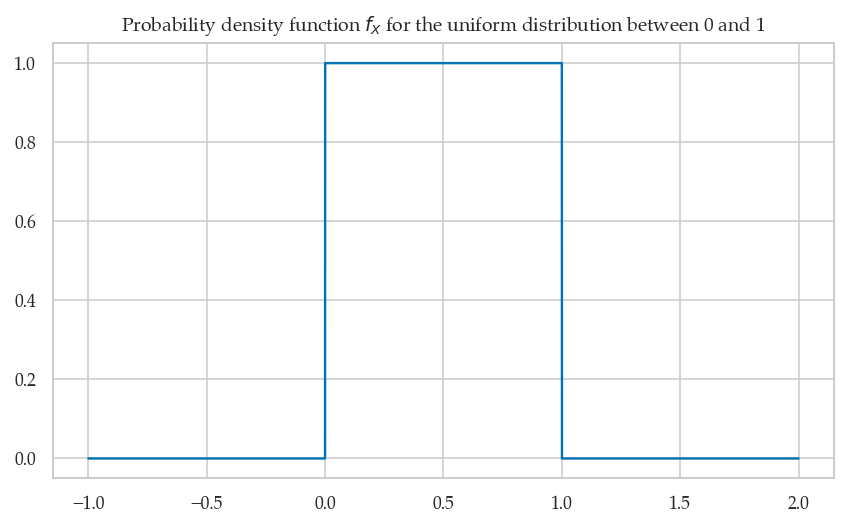

In [7]:
# plot the probability density function (pdf) of the random variable X
x = np.linspace(-1, 2, 10000)
fU = rvU.pdf(x)
_ = sns.lineplot(x=x, y=fU).set_title("Probability density function $f_X$ for the uniform distribution between 0 and 1")

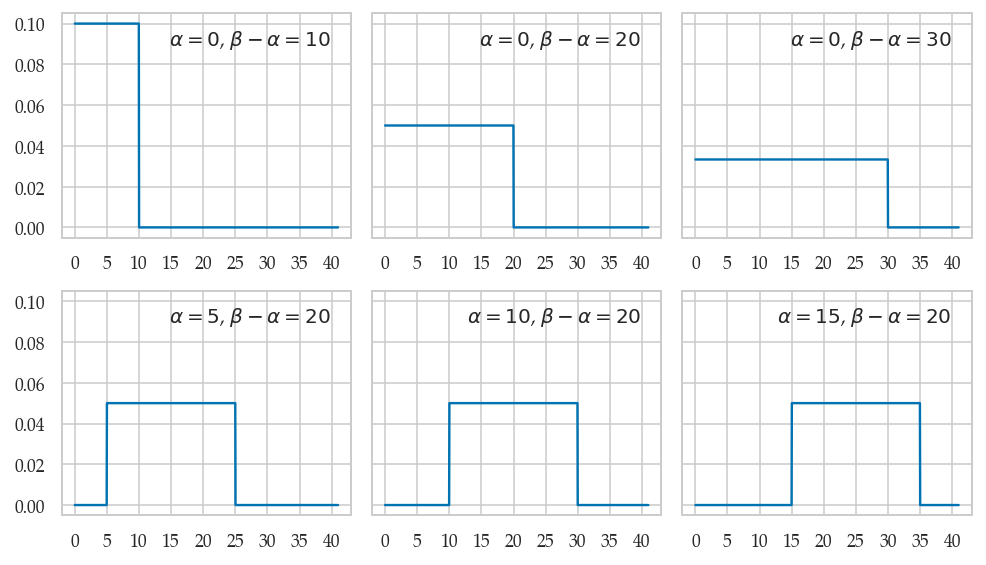

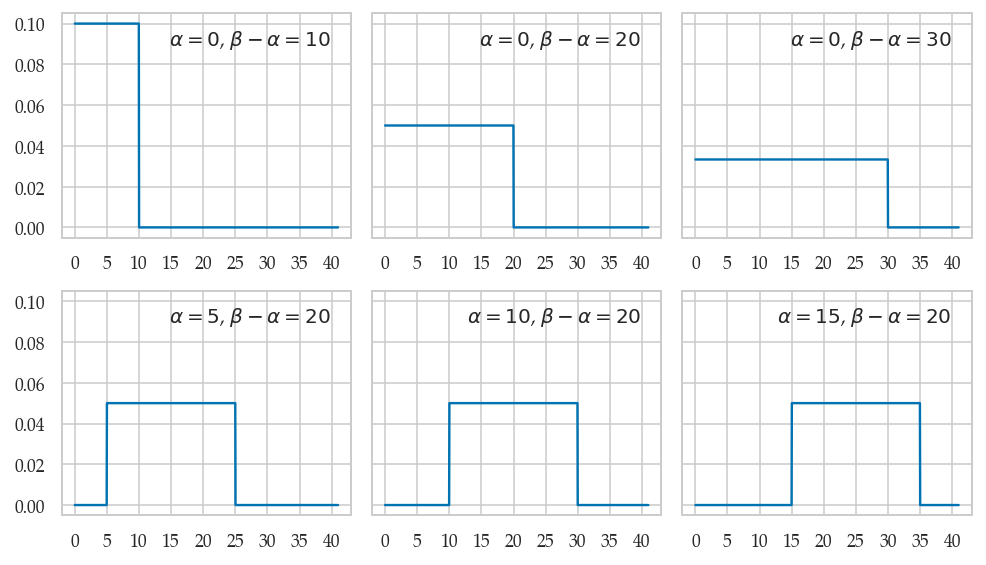

In [8]:
from scipy.stats import uniform

model = uniform
xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = 5

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=0,scale=10),  dict(loc=0,scale=20),  dict(loc=0,scale=30)],
    [dict(loc=5,scale=20),  dict(loc=10,scale=20),  dict(loc=15,scale=20)],
]

params_to_latex = {
    "loc":"\\alpha",
    "scale":"\\beta - \\alpha"
}

generate_pdf_panel("figures/prob/probpanels/uniform_panel.pdf",
                   xs, model, params_matrix,
                   params_to_latex=params_to_latex,
                   xticks=xticks)


## Normal probability distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    p_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$
The mean $\mu$ and the standard deviation $\sigma$ are called the parameters of the distribution.
The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions.


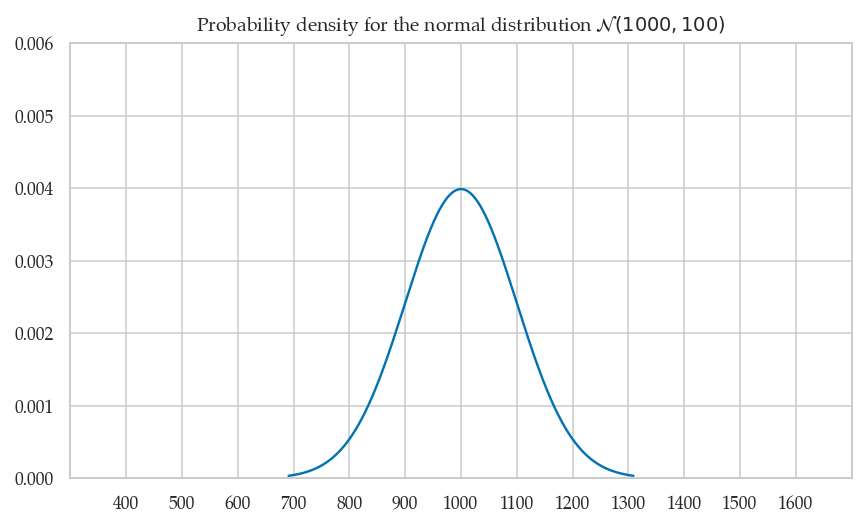

In [9]:
from scipy.stats import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rvN = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rvN.ppf(0.001), rvN.ppf(0.999), 10000)
y = rvN.pdf(x)
ax = sns.lineplot(x=x, y=y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

#### Panel

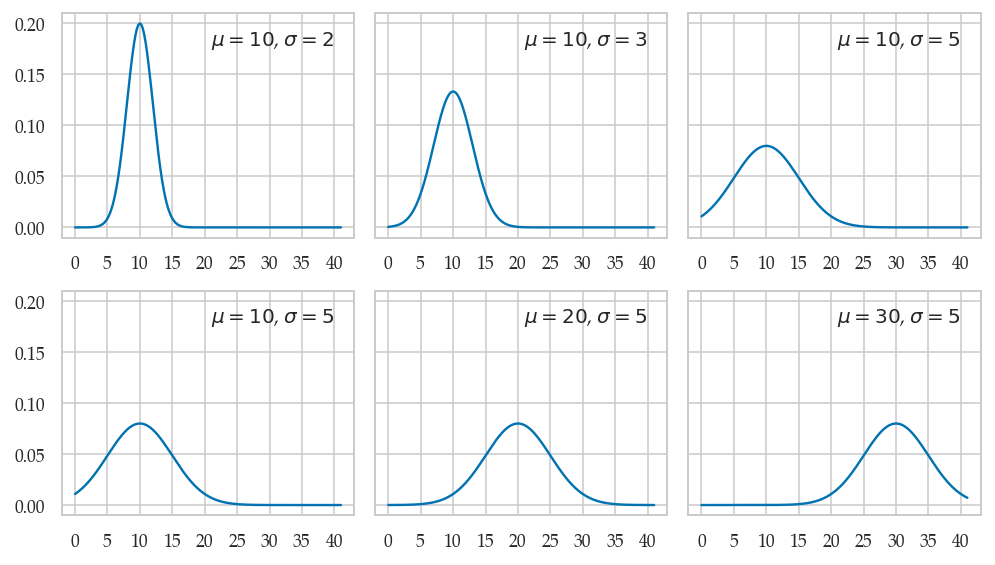

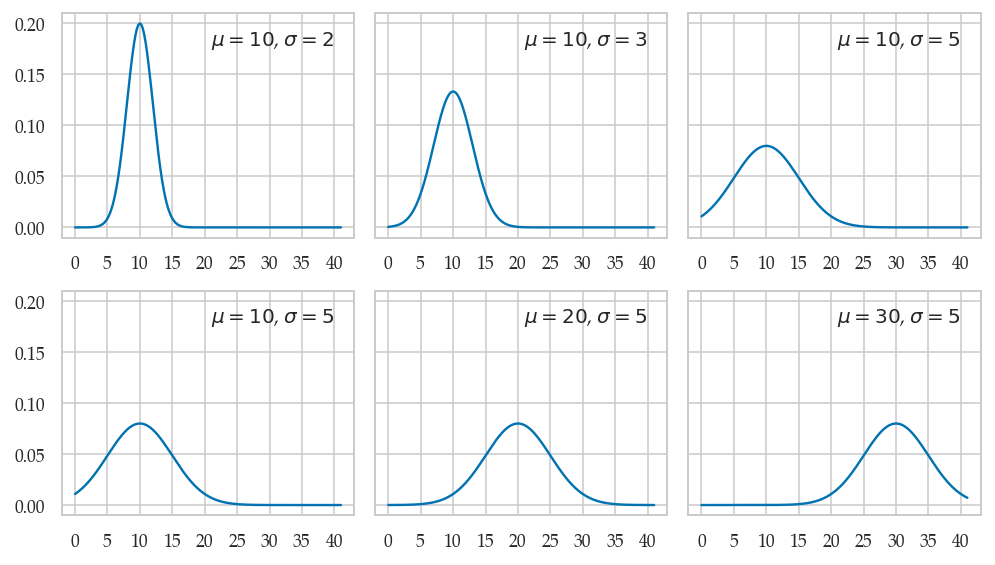

In [10]:
from scipy.stats import norm

model = norm
xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = 5


# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10, scale=2),  dict(loc=10, scale=3),   dict(loc=10, scale=5)],
    [dict(loc=10, scale=5),  dict(loc=20, scale=5),   dict(loc=30, scale=5)],
]

params_to_latex = {
    'loc': '\\mu',
    'scale': '\\sigma',
}

generate_pdf_panel("figures/prob/probpanels/normal_panel.pdf",
                   xs, model, params_matrix,
                   params_to_latex=params_to_latex,
                   xticks=xticks)
